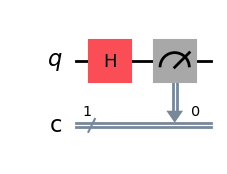

Measurement Results: {'0': 502, '1': 498}


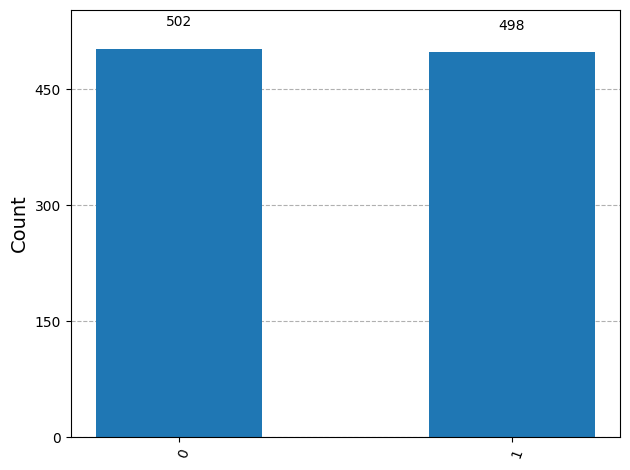

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
display(qc.draw(output="mpl"))

sim = Aer.get_backend('aer_simulator')
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts(qc)

print("Measurement Results:", counts)
plot_histogram(counts)
      


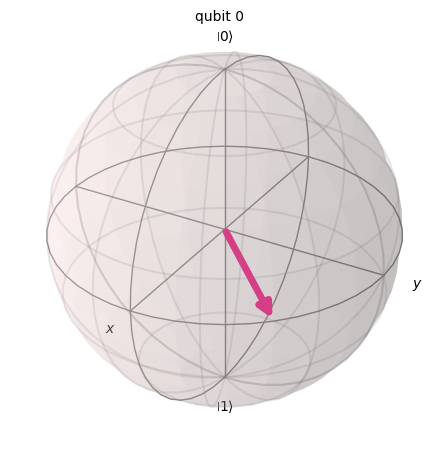

In [5]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)       
qc.t(0)       
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


Measurement Results: {'11': 510, '00': 490}


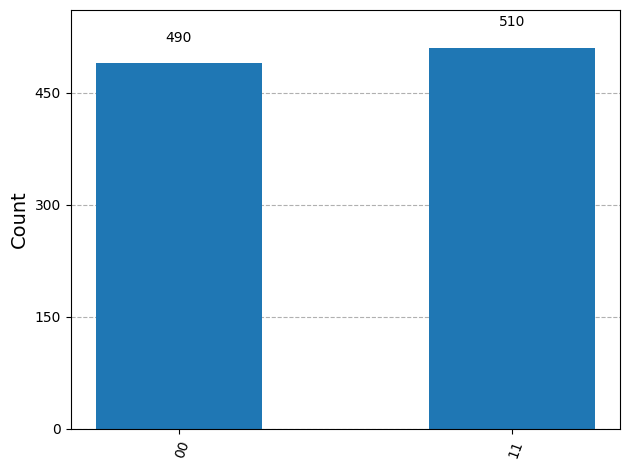

In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
qc.measure([0, 1], [0, 1])
sim = Aer.get_backend('aer_simulator')
job = sim.run(qc,shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Measurement Results:", counts)
plot_histogram(counts)

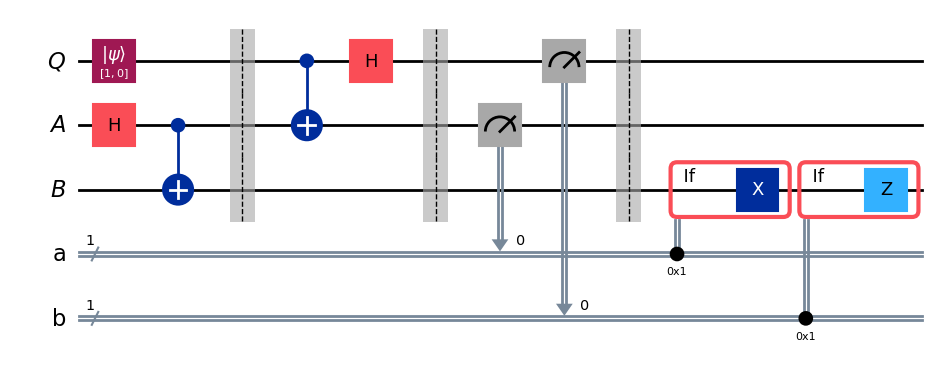

{'0 0 0': 240, '0 1 1': 279, '0 0 1': 220, '0 1 0': 261}


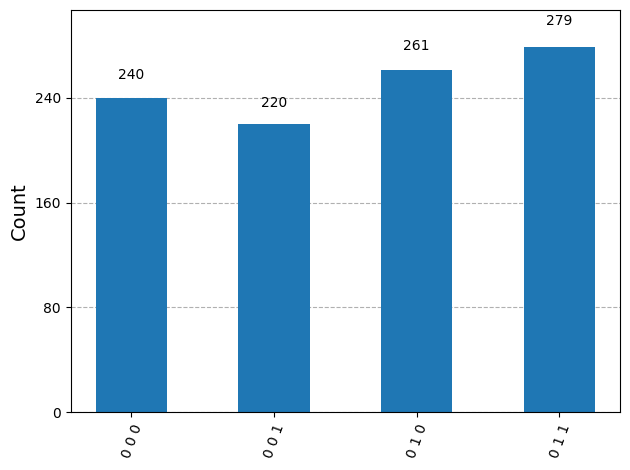

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

qc = QuantumCircuit(qubit, ebit0, ebit1, a, b)
qc.initialize([1, 0], qubit)

# Prepare ebit used for teleportation
qc.h(ebit0)
qc.cx(ebit0, ebit1)
qc.barrier()

# Alice's operations
qc.cx(qubit, ebit0)
qc.h(qubit)
qc.barrier()

# Alice measures and sends classical bits to Bob
qc.measure(ebit0, a)
qc.measure(qubit, b)
qc.barrier()

# Bob uses the classical bits to conditionally apply gates
with qc.if_test((a, 1)):
   qc.x(ebit1)
with qc.if_test((b, 1)):
    qc.z(ebit1)

display(qc.draw(output="mpl"))

#Bob measures final qubit
result = ClassicalRegister(1, "result")
qc.add_register(result)
qc.measure(ebit1, result)
# Use AerSimulator with support for dynamic circuits
sim = Aer.get_backend('aer_simulator')
# Assemble and run
job = sim.run(qc,shots=1000)
result = job.result()
# Get counts
counts = result.get_counts(qc)
print(counts)
# Plot result
plot_histogram(counts)


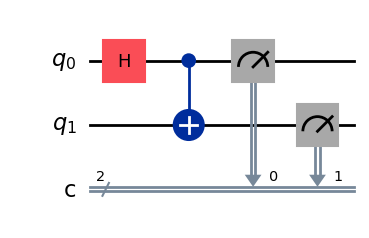

Entanglement result: {'00': 519, '11': 505}


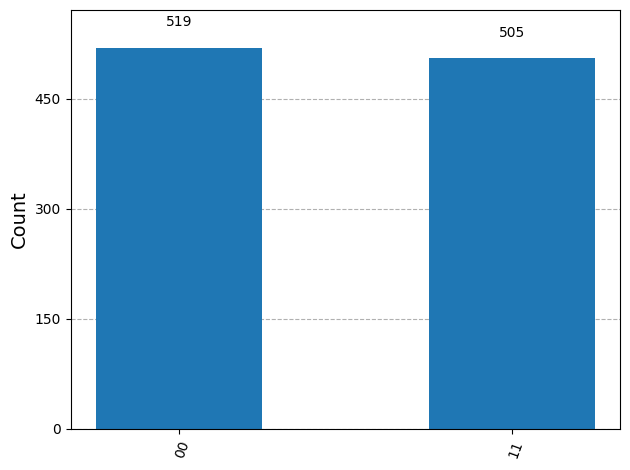

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])

display(qc.draw(output="mpl"))

sim = Aer.get_backend('aer_simulator')
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("Entanglement result:", counts)
plot_histogram(counts)

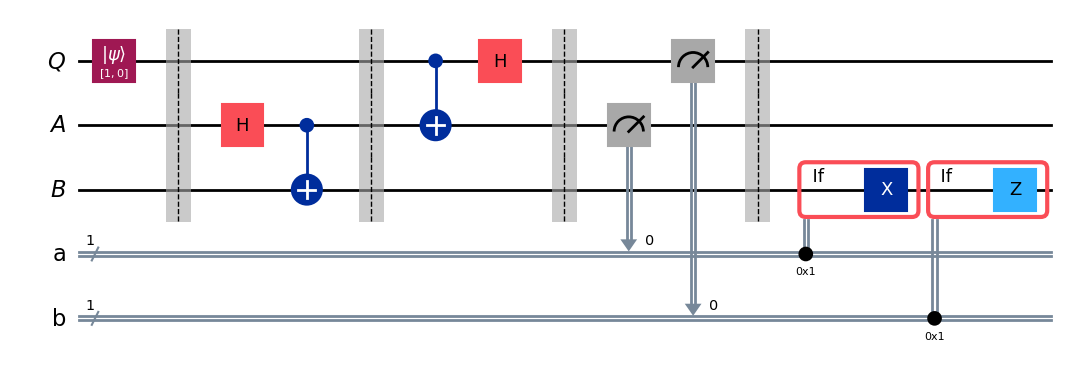

Measurement Results: {'0 1 1': 252, '0 0 1': 253, '0 0 0': 242, '0 1 0': 253}


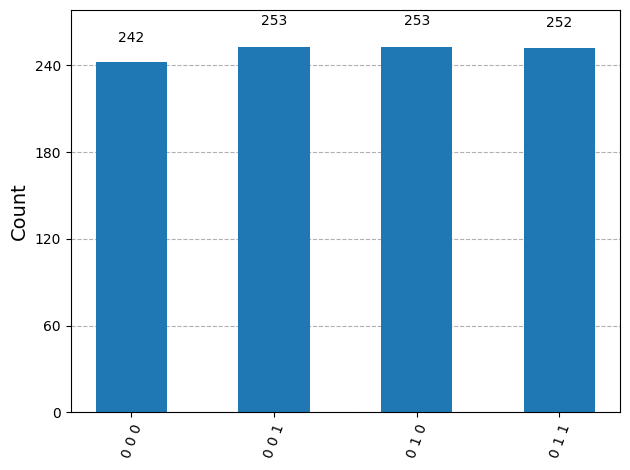

In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)
protocol.initialize([1, 0], qubit)
protocol.barrier()

protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

result = ClassicalRegister(1, "result")
protocol.add_register(result)
sim = AerSimulator(method='statevector', max_parallel_threads=1)
job = sim.run(protocol, shots=1000)

result = job.result()
counts = result.get_counts(protocol)
print("Measurement Results:", counts)
plot_histogram(counts)